# Weborama. Тестовое задание

Гарист Владислав

__Задание__

Представленные задания  довольно стандартные для ДС, первые попроще, последнее поинтереснее, __все их выполнять не нужно!__ достаточно выбрать что-то на свой вкус и сделать следующее:

а) выполнить  (можно отклоняться от рамок задания, если есть интересные идеи. Вполне может что-то не получиться – это тоже совершенно нормально. Главное – отразить это все в отчете, см пункт б)

б) результаты представить в виде краткого отчета-презентации на английском языке – постановка задачи, какими методами решалась, какие дали результат, какие не дали, визуализации где они уместны  – представь, что тебе с этой презентацией выступать перед клиентом J

в) также прислать тетрадку, в которой происходило решение задачи

__Telephone task__

Имеем айди пользователей, коэффициент интенсивности пользования сотовой связью (принимает значения от 1 до 6, местами данных нет - na) и характеристики - соцдем + интересы пользователей в формате название:степень вовлеченности (от 1 до 14). Где-то данных нет. Такова жизнь)

Цель - по имеющимся данным спрогнозировать возможные значения вместо na в коэффиценте интенсивности.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style(style='white')

## Telephone task

### Этап 1: Предварительная обработка

In [2]:
df_data = pd.read_csv('./telephone_task.csv', delimiter=';', header=-1)
df_data.columns = ['user_id', 'intencity', 'f1', 'f2']

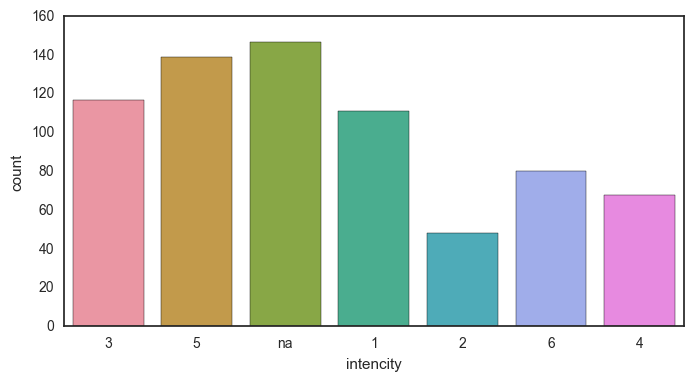

In [3]:
plt.figure(figsize=(8,4))
sns.countplot(df_data.intencity)

In [4]:
print( 'Не заполены признаки у {} пользователей.\nСреди них {} нужно классифицировать.'.format(len(df_data[df_data.f1.isnull()]),
     np.sum(df_data[df_data.f1.isnull()].intencity == 'na') ) )

Не заполены признаки у 508 пользователей.
Среди них 103 нужно классифицировать.


Если данные анкеты не заполнены, присваиваем моду на всем датасете, то есть intencity = 5. Тут больше ничего не остается.

Признаки заполнены только у 202 наблюдений из 710.
Причем, 44 из 202 заполненных необходимо классифицировать.


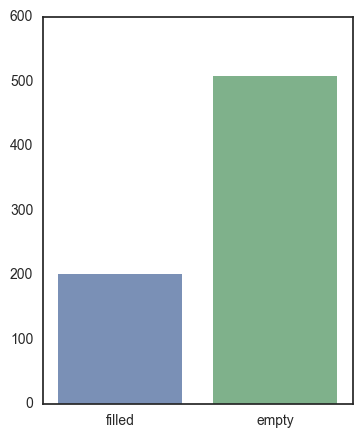

In [5]:
df_mobile = df_data[-df_data.f1.isnull()].drop('user_id', axis=1)
a, b = len(df_mobile), len(df_data)-len(df_mobile)
c = np.sum(df_mobile.intencity == 'na')
print('Признаки заполнены только у {} наблюдений из {}.'.format(a,a+b))
print('Причем, {} из {} заполненных необходимо классифицировать.'.format(c,a))

plt.figure(figsize=(4,5))
sns.barplot(['filled', 'empty'], [a,b], linewidth=0, alpha=0.8)
plt.show()

In [6]:
# f1 parcing :
row = [ i.split(':') for i in df_mobile.iloc[0].f1.split(',') ]
soc_features = [i[0] for i in row]
df_f1 = pd.DataFrame(columns=soc_features, index = range(len(df_mobile)))
# 
for i, row in enumerate( df_mobile.f1.apply(lambda x: np.array([ i.split(':')[1] for i in x.split(',') ])) ):
        df_f1.loc[i] = row

print('Есть ли после обработки пропущенные значения ?\n', df_f1.isnull().any())
df_f1.head()

Есть ли после обработки пропущенные значения ?
 aged 35 to 49         False
aged 25 to 34         False
aged 15 to 17         False
aged 65 and more      False
aged 50 to 64         False
aged 18 to 24         False
upper middle class    False
lower middle class    False
retired               False
student               False
female                False
male                  False
dtype: bool


,aged 35 to 49,aged 25 to 34,aged 15 to 17,aged 65 and more,aged 50 to 64,aged 18 to 24,upper middle class,lower middle class,retired,student,female,male
0,12,1,1,13,14,1,1,3,14,5,10,5
1,13,5,12,5,5,9,1,5,14,7,4,11
2,6,11,7,8,7,7,10,7,9,6,10,5
3,1,14,14,1,2,14,2,4,2,14,14,1
4,4,10,10,6,6,9,10,7,6,8,10,5


In [7]:
# f2 parcing :

# заполняем пропуски, если хобби отсутствует
df_mobile.f2 = df_mobile.f2.fillna(value='No_hobby:1')

hobby_features = set() # множество дополнительных признаков
for i in df_mobile.f2.apply(lambda x: [i.split(':')[0] for i in x.split(',')] ):
    hobby_features |= set(i)

df_f2 = pd.DataFrame(columns = list(hobby_features) )
for i, row in enumerate( df_mobile.f2.apply(lambda x: x.split(',')) ):
    row_names = [s.split(':')[0] for s in row]
    row_values = [s.split(':')[1] for s in row]
    df_f2.loc[i, row_names] = row_values

df_f2.head()

,Insurance,Stop smoking,Audio and video,ISP & Browsers,Bodybuilding,Advertising,TV Shows,Building and civil engineering,Banking,Culture purchases,...,Fashion trend,Good deals,Going out,Software,Art,Politics,Holiday rentals,Real estate,Kitchen Appliances,Cycling
0,NaN,NaN,NaN,13,NaN,2,5,NaN,NaN,NaN,...,3,NaN,3,13,NaN,3,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,...,NaN,5,1,NaN,1,NaN,NaN,1,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN


In [8]:
# Данные после преобразования - тут и обучающая и тестовая выборка вместе
Y_raw = df_mobile.intencity; Y_raw.index = range(len(Y_raw))
X_raw = pd.DataFrame( data=np.hstack((df_f1, df_f2)),
                 columns = list(df_f1.columns) + list(df_f2.columns) )
data_raw = pd.DataFrame(data=np.hstack( (Y_raw[:,None], X_raw) ),
                        columns=['intencity'] + list(X_raw.columns) )

# разделим данные:
data = data_raw[data_raw.intencity != 'na']
Y, Y_na = Y_raw[-(Y_raw == 'na')].astype('int'), Y_raw[(Y_raw == 'na')]
X, X_na = X_raw.loc[-(Y_raw == 'na')], X_raw.loc[(Y_raw == 'na')]
X.head()

,aged 35 to 49,aged 25 to 34,aged 15 to 17,aged 65 and more,aged 50 to 64,aged 18 to 24,upper middle class,lower middle class,retired,student,...,Fashion trend,Good deals,Going out,Software,Art,Politics,Holiday rentals,Real estate,Kitchen Appliances,Cycling
0,12,1,1,13,14,1,1,3,14,5,...,3,NaN,3,13,NaN,3,NaN,NaN,NaN,NaN
1,13,5,12,5,5,9,1,5,14,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,14,14,1,2,14,2,4,2,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10,10,6,6,9,10,7,6,8,...,NaN,1,NaN,NaN,1,1,NaN,NaN,NaN,NaN
5,4,10,14,3,5,14,7,2,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Комментарии__

 + Интересы пользователесь сильно варьируются, поэтому после обработки матрица объектов-признаков получилась сильно разрежена.
 + Все признаки разбиты на категории, поэтому применимость линейных методов для классификации (например, логистической регрессии) оказывается неоправданной (потребуется бинаризация признаков, а тогда и без того малое количество признаков значительно многократно возрастет).
 + Для классификации в качестве альтернативы стоит использовать дверовидные методы, а точнее их композиции. Яркие представители: RandomForest и GradientBoosting. Первый позволяет уменьшить дисперсию прогнозов, второй - сдвиг.
 + Композиции алгоритмов традиционно показывают себя лучше в задачах классификации. Однако попробуем сравнить их с представителями семейства метрических алгоритмов, например KNN, а также представителем линейных алгоритмов - SVM. Численно значения категориальных признаков уже находятся в одном масштабе. Это важно потому, что при подсчете расстояний никакие признаки не будут искажать результаты при вычисления расстояний - это хорошо.

### Этап 2: Предварительный визуальный анализ

In [9]:
# если категории - как целочисленные
X_try_1 = X.iloc[:,:12].astype('int')
X_try_1_na = X_na.iloc[:,:12].astype('int')

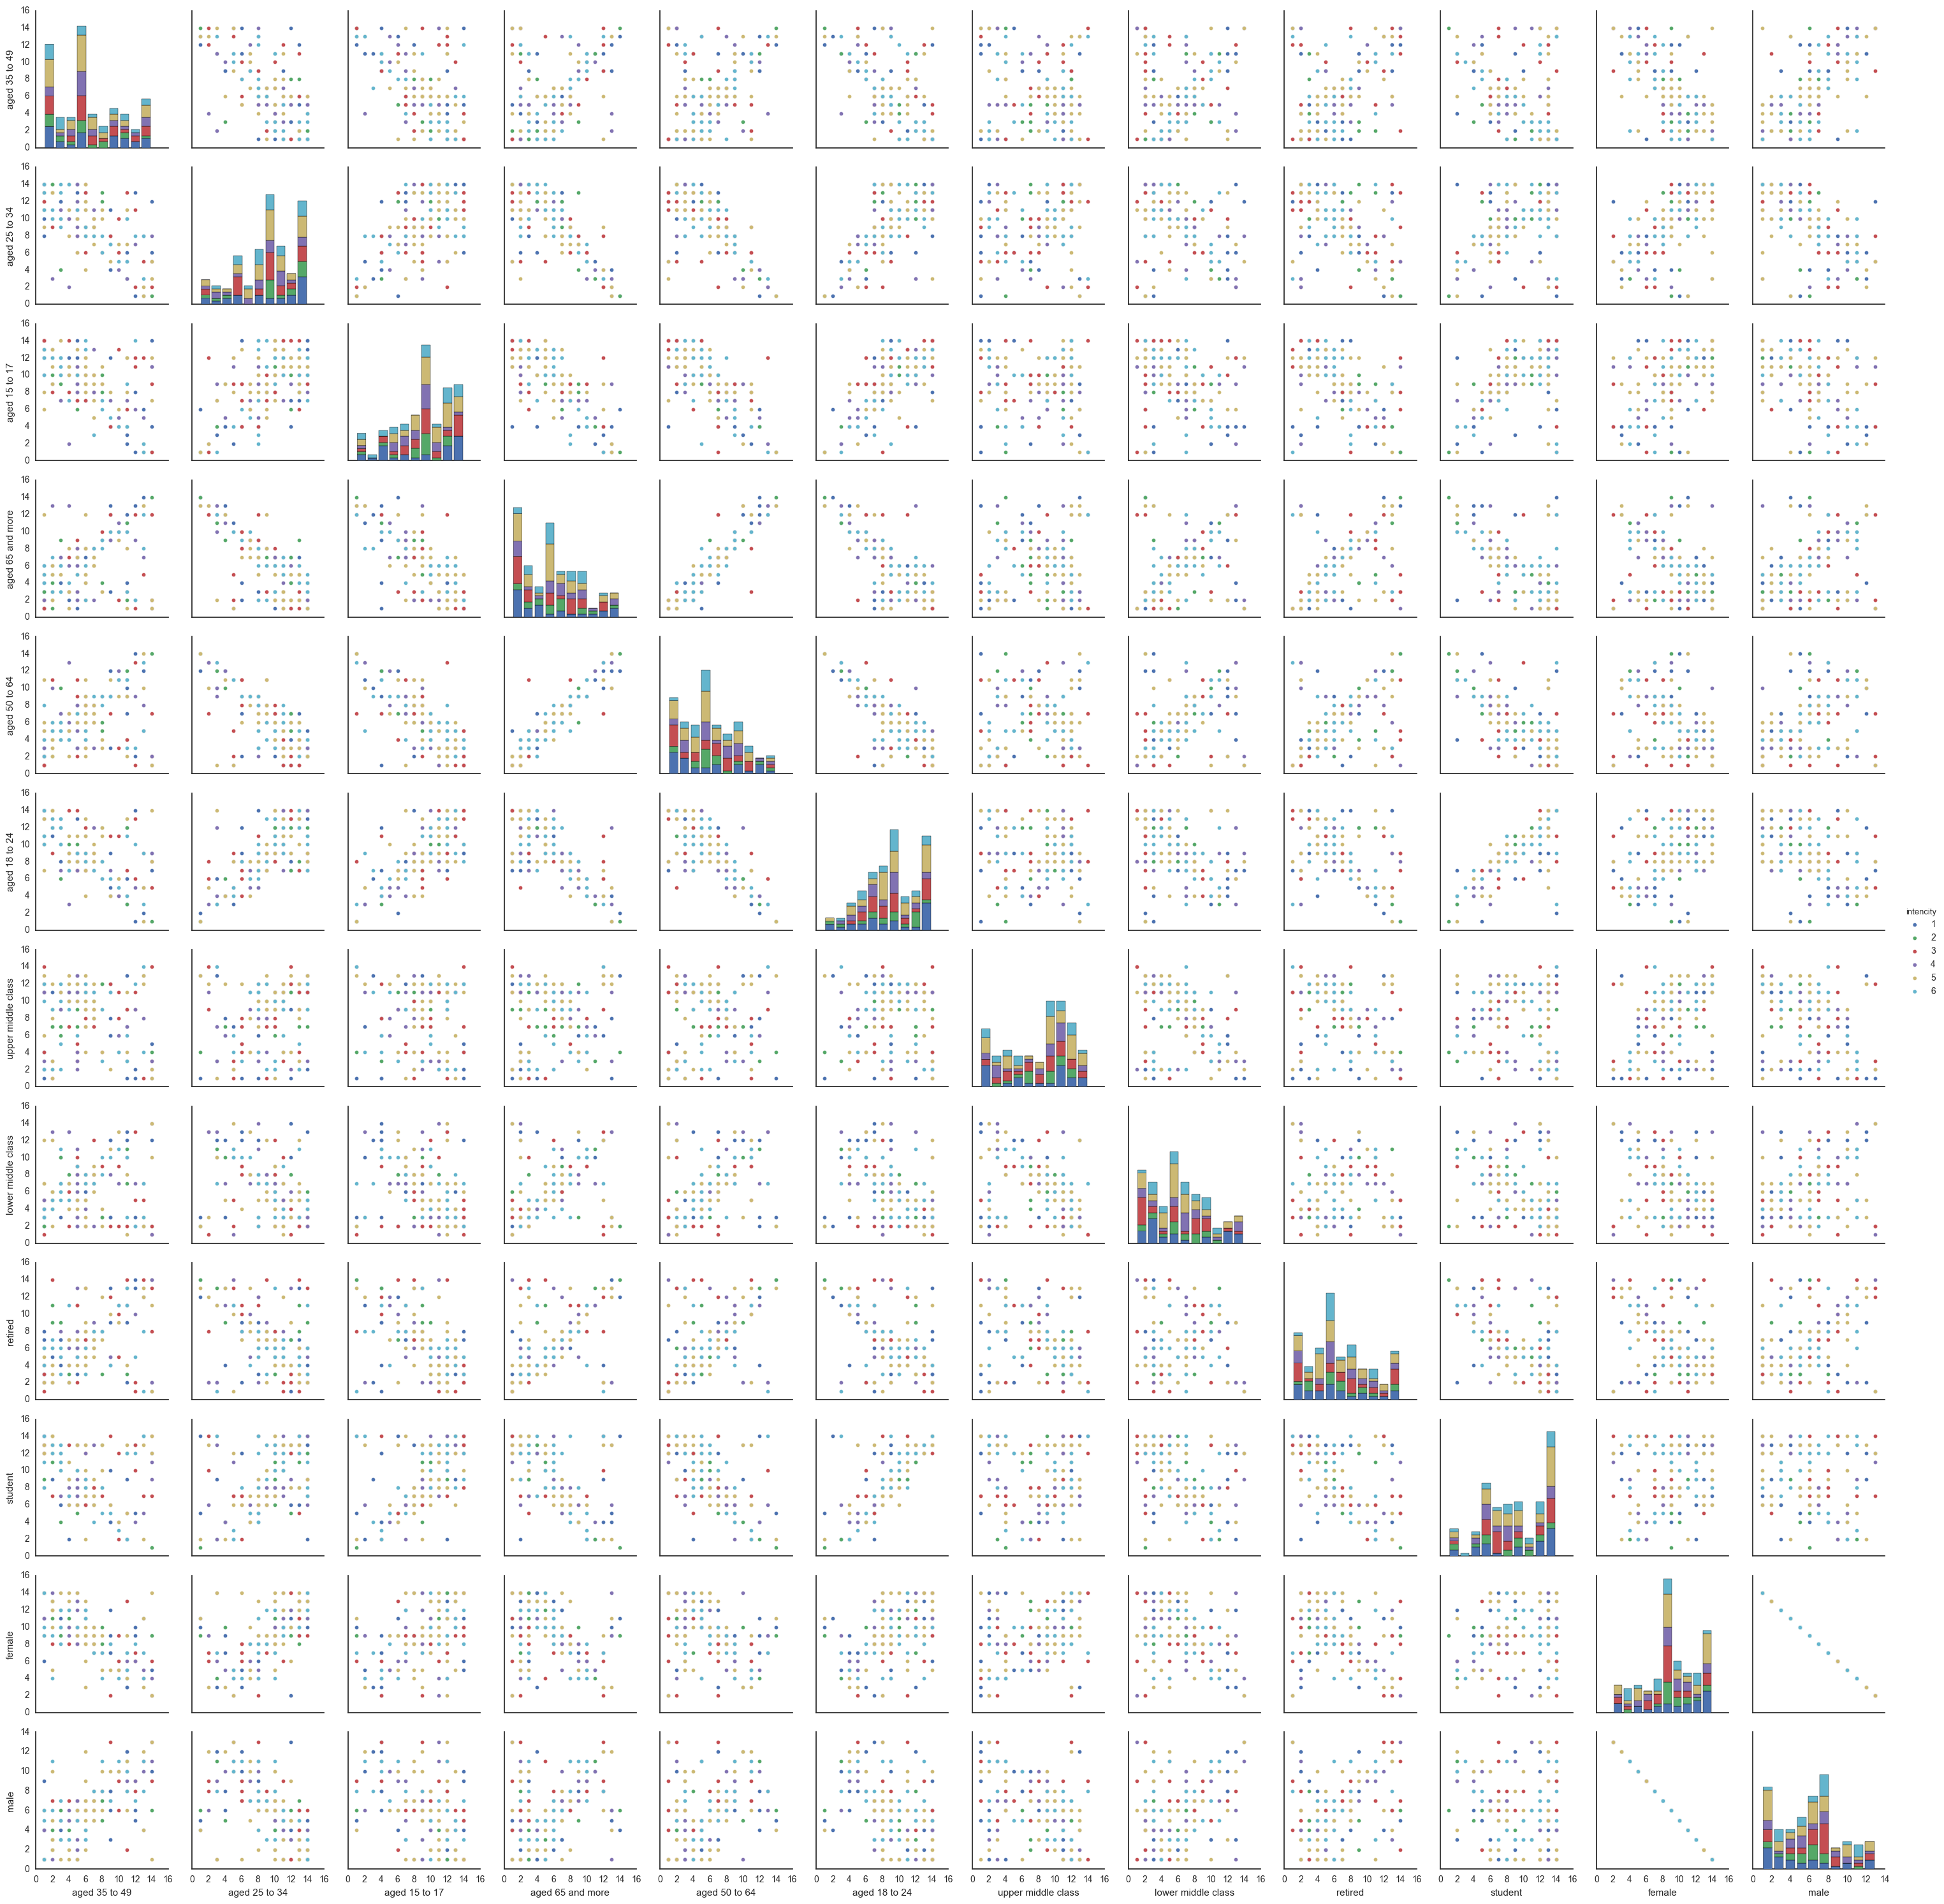

In [10]:
# попарные корреляции
sns.pairplot( data.iloc[:,:13].astype('int'), hue='intencity', vars=data.iloc[:,1:13].columns )

Чисто визуально, тяжело выделить такие признаки, которые хорошо объясняют 'intencity', все цвета разбросаны относительно равномерно.

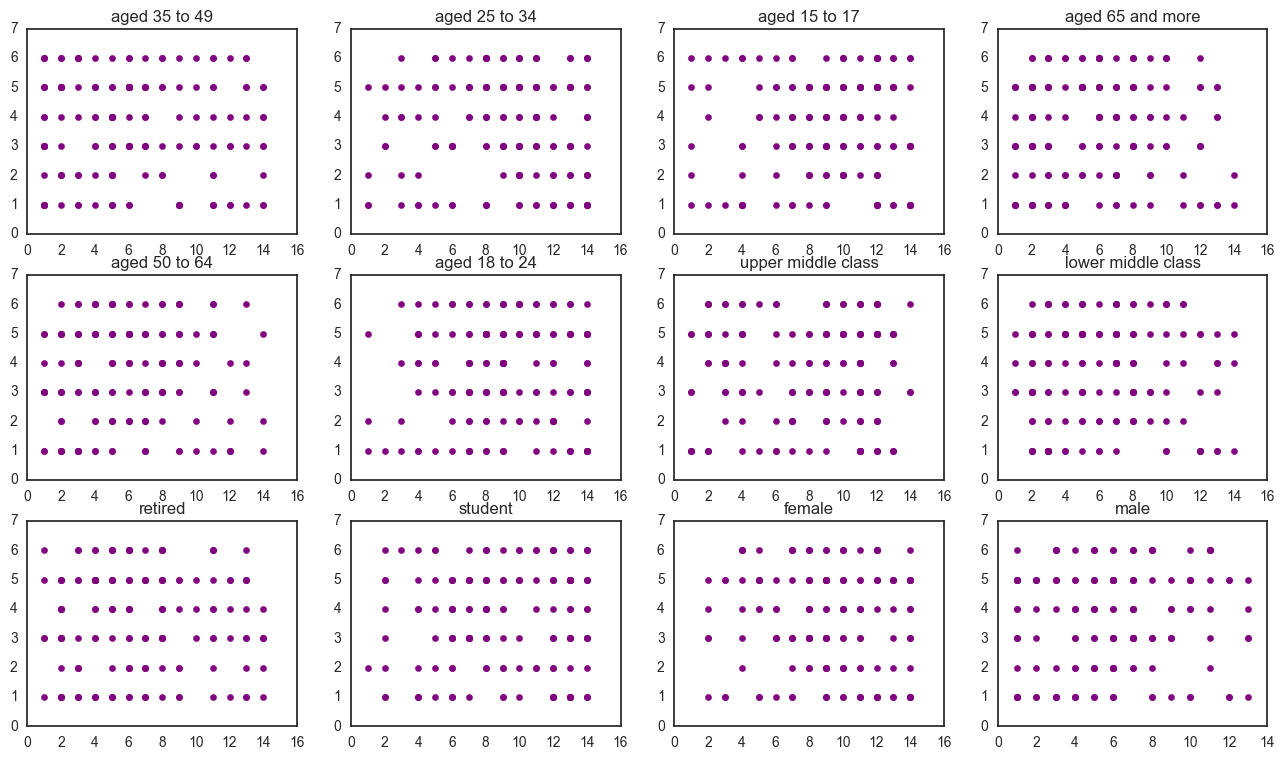

In [11]:
# Посмотрим, есть ли корреляция у признаков с номером класса (intencity)
plt.figure(figsize=(16,9))
for i, feature in enumerate(X_try_1):
    plt.subplot( 3,4,i+1 )
    plt.title(feature)
    plt.scatter(X_try_1[feature], Y, color='purple')

Возникают подозрения что эти данные очень плохо будут классифицировать наши категории.

Распределения очень похожи на равномерные.

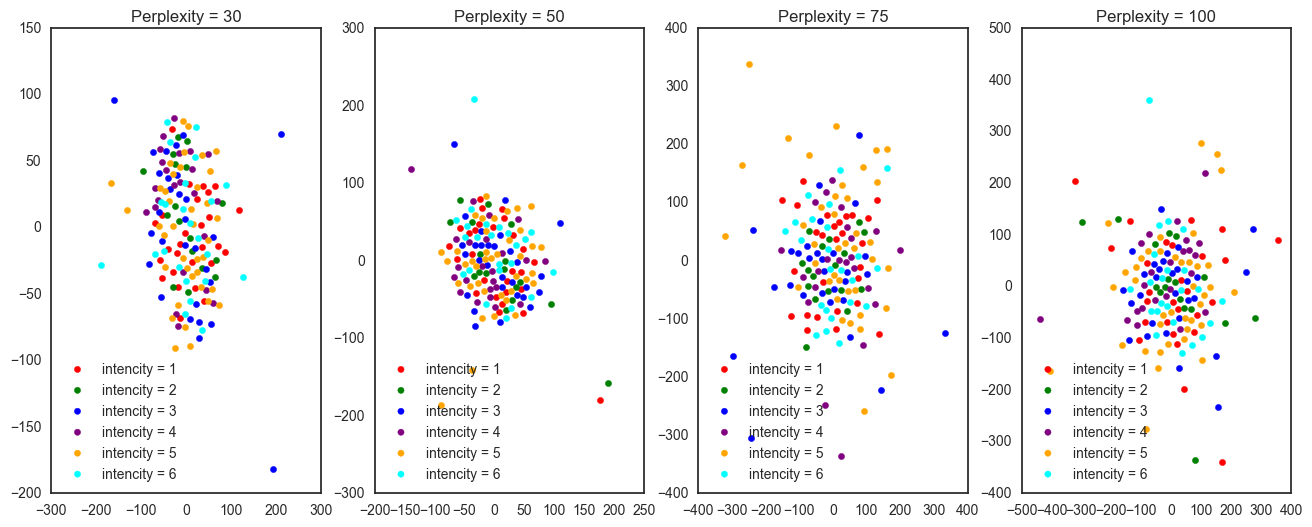

In [12]:
# попробуем выделить облака классов с помощью алгоритмов визуализации (в частности, TSNE)
from sklearn.manifold import TSNE
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
perplexity = [30, 50, 75, 100]

plt.figure(figsize=(16,6))
for n,p in enumerate(perplexity):
    model_tsne = TSNE(n_components=2, perplexity=p, random_state=42)
    df_tsne = np.hstack( (model_tsne.fit_transform(X_try_1), Y[:,None]) )
    
    plt.subplot(1, 4, n+1)
    plt.title('Perplexity = {}'.format(p))
    
    for i,j in zip( colors, np.unique(Y) ):
        x = df_tsne[df_tsne[:,2] == j][:,0]
        y = df_tsne[df_tsne[:,2] == j][:,1]
        plt.scatter(x, y, color = i, label = 'intencity = {}'.format(j))
        plt.legend(loc=3)

Попытка визуальной классификации только подтвердила наши подозрения.

Не похоже, что можно четко провести разделяющую поверхность, классы перемешиваются, причем с завидной долей равномерности.

### Этап 3: Классификация

1. Без учета Хобби
2. С дополнительной информацией о хобби, пропуски заполнены нулями
3. С дополнительной информацией о хобби, учитываем только ТОП-20 самых популярных хобби
4. Применим балансировку классов на лучшем из первых 3-х вариантов

In [13]:
# импортируем модели, которые будем сравнивать: 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.feature_extraction import DictVectorizer as DV

# подбирать будем параметры по сетке
from sklearn.grid_search import GridSearchCV

/Applications/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [15]:
# будем оценивать качество на кросс-валидации по 5 блокам, поскольку данных не очень много
kfold = KFold(n = len(Y), n_folds=5, random_state=42, shuffle=True)

In [16]:
# автоматизируем отрисовку графиков с выбором параметров по сетке:
def plot_scores(grid, param_name):
    params = np.array([i[0][param_name] for i in grid.grid_scores_])
    means = np.array([i[1] for i in grid.grid_scores_])
    stds = np.array([i[2].std() for i in grid.grid_scores_])
    best_param = grid.best_params_[param_name]
    best_score = np.max(means)
    plt.plot(params, means, '.-', linewidth=0.5, color='purple')
    plt.scatter(best_param, best_score, color='red', s=80, alpha=0.7,
                label='optimal {}: {}. Score = {}'.format(param_name,
                                                          best_param,
                                                          np.round(best_score, 3)))
    plt.fill_between(params, y1 = means + stds/2, y2 = means - stds/2, alpha=0.1)
    plt.xlabel(param_name)
    plt.ylabel('score')
    plt.legend()
    plt.show()

__Попытка 1: Не учитываем интересы пользователей__

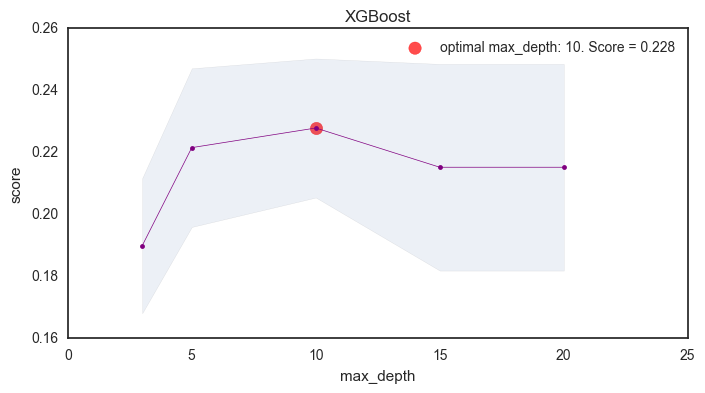

In [17]:
# Boosting

model_xgb_1 = XGBClassifier(objective='multi:softprob', n_estimators=100)
grid_xgb_1 = GridSearchCV(model_xgb_1, param_grid={'max_depth': [3,5,10,15,20]}, cv=kfold)
grid_xgb_1.fit(X_try_1, y=Y)

plt.figure(figsize=(8,4))
plt.title('XGBoost')
plot_scores(grid_xgb_1, 'max_depth')

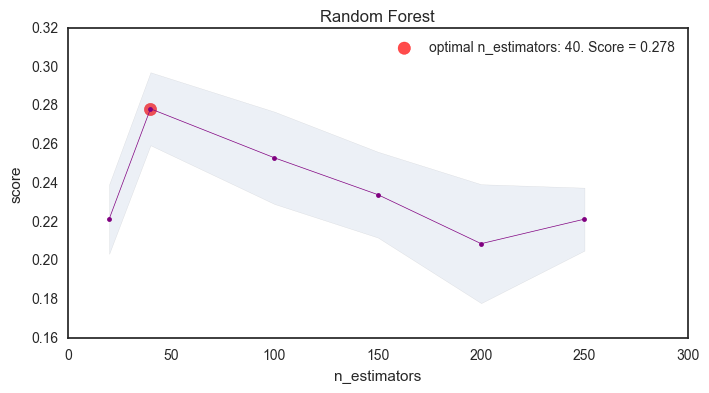

In [18]:
# RandomForest

model_rf_1 = RandomForestClassifier(random_state=42)
grid_rf_1 = GridSearchCV(model_rf_1, param_grid={'n_estimators': [20,40,100,150,200,250]}, cv=kfold)
grid_rf_1.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('Random Forest')
plot_scores(grid_rf_1, 'n_estimators')

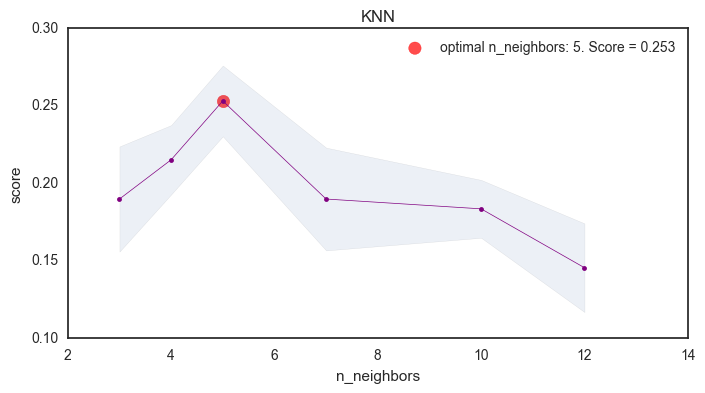

In [19]:
# KNN

model_knn_1 = KNeighborsClassifier()
grid_knn_1 = GridSearchCV(model_knn_1, param_grid={'n_neighbors': [3, 4, 5, 7, 10, 12]}, cv=kfold)
grid_knn_1.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('KNN')
plot_scores(grid_knn_1, 'n_neighbors')

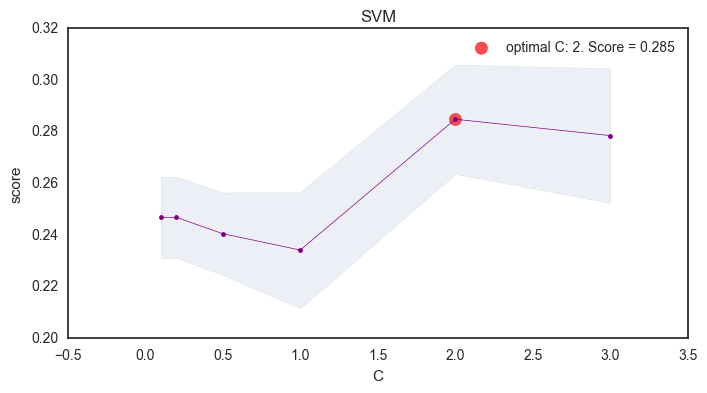

In [20]:
# SVM
model_svm_1 = SVC(decision_function_shape='ovo')
grid_svm_1 = GridSearchCV(model_svm_1, param_grid={'C': [ 0.1, 0.2, 0.5, 1, 2, 3 ]}, cv=kfold)
grid_svm_1.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('SVM')
plot_scores(grid_svm_1, 'C')

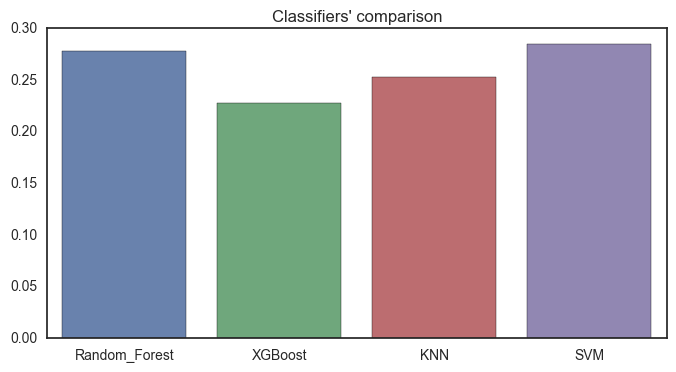

In [21]:
models = [grid_rf_1, grid_xgb_1, grid_knn_1, grid_svm_1]

plt.figure(figsize=(8,4))
plt.title("Classifiers' comparison")
sns.barplot( x = ['Random_Forest', 'XGBoost', 'KNN', 'SVM'],
            y = [i.best_score_ for i in models], alpha=0.9 )

Результаты оказались весима странными, что подтверждает нашу исходную гипотезу, что intencity распределена равномерно по всем social признакам.

Лучшая точность оказалась равной примерно 30%, к тому же у SVM, который почему-то обошел XGBoost и Random_Forest.

__Подход 1.1: Бинаризация категорий__

Мы рассматривали категориальные данные как целочисленные. Вдруг плохое качество классификаторов связано именно с этим, что, вообще говоря, маловероятно. В частности, и RandomForest и XGBoost не чувствительны к бинаризации, ведь деревья должны отлично справляться с целочисленными значениями, разбивая их логически в каждом листе на подкатегории.

Попробуем бинаризировать признаки (one-hot encoding) и посмотреть на результат, скажем, с применением SVM.
Стоит использовать регуляризацию, поскольку предварительные визуальный анализ явно показал наличие корреляции между признаками.

In [22]:
from sklearn.feature_extraction import DictVectorizer as DV

encoder = DV(sparse = False)
X_try_1_1 = encoder.fit_transform(X_try_1.astype('str').T.to_dict().values())
X_try_1_1.shape

(158, 166)

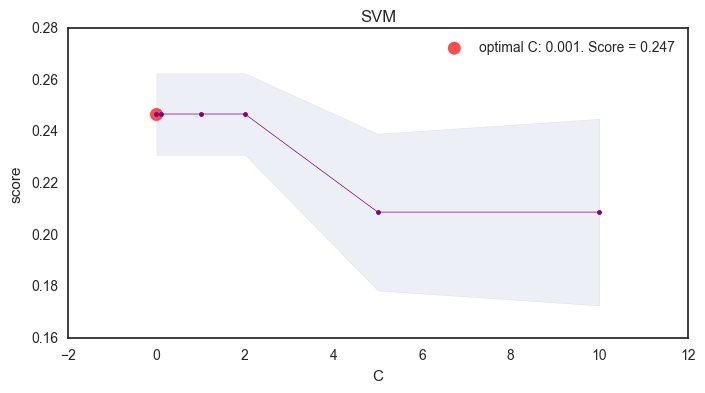

In [23]:
model_svm_1_1 = SVC(decision_function_shape='ovo')
grid_svm_1_1 = GridSearchCV(model_svm_1_1, param_grid={'C': [ 0.001, 0.1, 1, 2, 5, 10 ]}, cv=kfold)
grid_svm_1_1.fit(X_try_1_1, Y)

plt.figure(figsize=(8,4))
plt.title('SVM')
plot_scores(grid_svm_1_1, 'C')

Качество по-прежнему остается очень низким. Значит, дело не в бинаризации категориальных признаков.

__Подход 2: Добавляем хобби, заменив пропуски нулями__

In [24]:
X_try_2, X_try_2_na = X.fillna(value=0).astype('int'), X_na.fillna(value=0).astype('int')
X_try_2.head()

,aged 35 to 49,aged 25 to 34,aged 15 to 17,aged 65 and more,aged 50 to 64,aged 18 to 24,upper middle class,lower middle class,retired,student,...,Fashion trend,Good deals,Going out,Software,Art,Politics,Holiday rentals,Real estate,Kitchen Appliances,Cycling
0,12,1,1,13,14,1,1,3,14,5,...,3,0,3,13,0,3,0,0,0,0
1,13,5,12,5,5,9,1,5,14,7,...,0,0,0,0,0,0,0,0,0,0
3,1,14,14,1,2,14,2,4,2,14,...,0,0,0,0,0,0,0,0,0,0
4,4,10,10,6,6,9,10,7,6,8,...,0,1,0,0,1,1,0,0,0,0
5,4,10,14,3,5,14,7,2,4,13,...,0,0,0,0,0,0,0,0,0,0


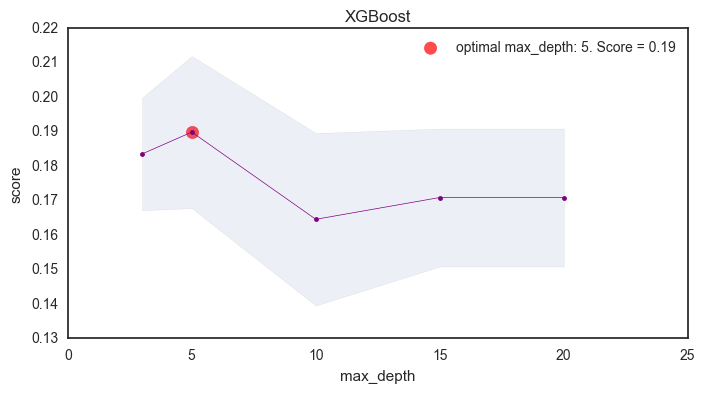

In [25]:
# Boosting
model_xgb_2 = XGBClassifier(objective='multi:softprob', n_estimators=100)
grid_xgb_2 = GridSearchCV(model_xgb_2, param_grid={'max_depth': [3,5,10,15,20]}, cv=kfold)
grid_xgb_2.fit(X_try_2.values, y=Y)

plt.figure(figsize=(8,4))
plt.title('XGBoost')
plot_scores(grid_xgb_2, 'max_depth')

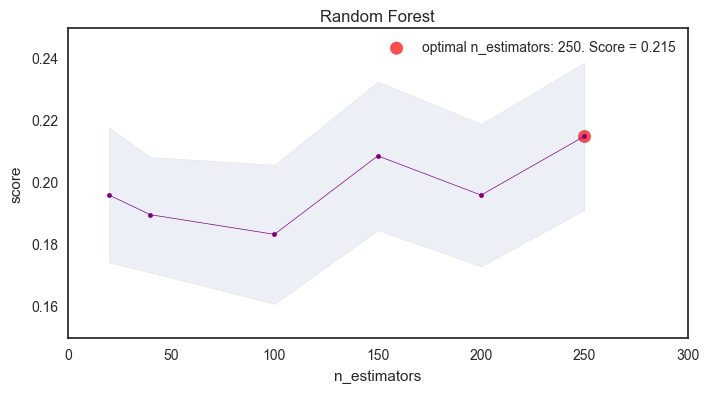

In [26]:
# RandomForest
model_rf_2 = RandomForestClassifier(random_state=42)
grid_rf_2 = GridSearchCV(model_rf_2, param_grid={'n_estimators': [20,40,100,150,200,250]}, cv=kfold)
grid_rf_2.fit(X_try_2, Y)

plt.figure(figsize=(8,4))
plt.title('Random Forest')
plot_scores(grid_rf_2, 'n_estimators')

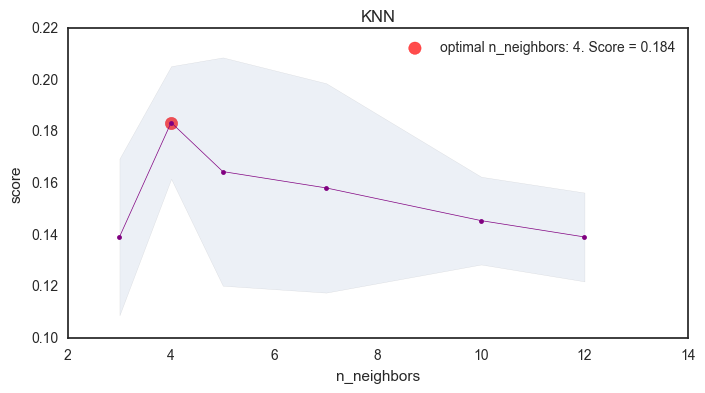

In [27]:
# KNN
model_knn_2 = KNeighborsClassifier()
grid_knn_2 = GridSearchCV(model_knn_2, param_grid={'n_neighbors': [3, 4, 5, 7, 10, 12]}, cv=kfold)
grid_knn_2.fit(X_try_2, Y)

plt.figure(figsize=(8,4))
plt.title('KNN')
plot_scores(grid_knn_2, 'n_neighbors')

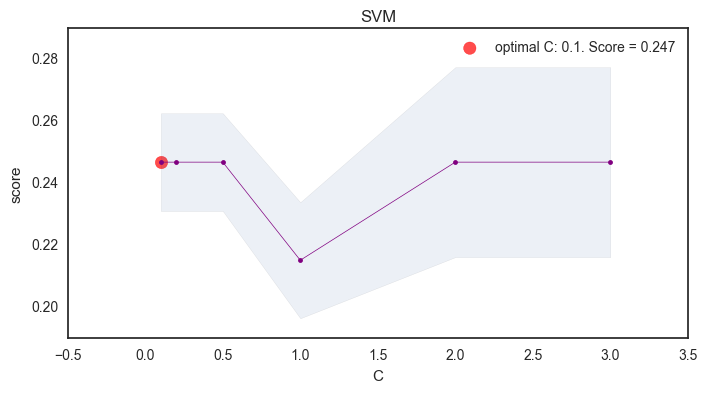

In [28]:
# SVM
model_svm_2 = SVC(decision_function_shape='ovo')
grid_svm_2 = GridSearchCV(model_svm_2, param_grid={'C': [ 0.1, 0.2, 0.5, 1, 2, 3 ]}, cv=kfold)
grid_svm_2.fit(X_try_2, Y)

plt.figure(figsize=(8,4))
plt.title('SVM')
plot_scores(grid_svm_2, 'C')

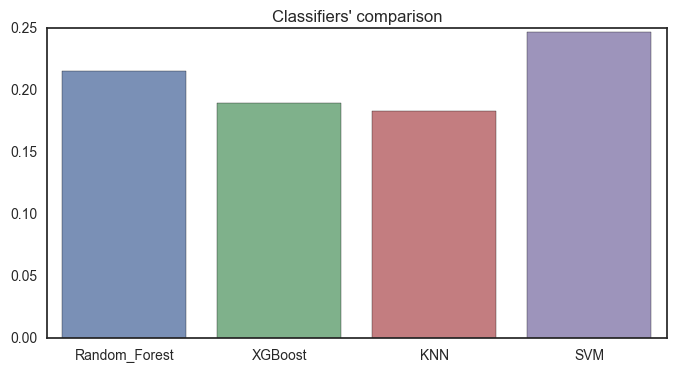

In [29]:
models = [grid_rf_2, grid_xgb_2, grid_knn_2, grid_svm_2]

plt.figure(figsize=(8,4))
plt.title("Classifiers' comparison")
sns.barplot( x = ['Random_Forest', 'XGBoost', 'KNN', 'SVM'],
            y = [i.best_score_ for i in models], alpha=0.8 )

__Подход 3: Попробуем оставить только наиболее часто встречаемые хобби у пользователей__

In [30]:
hobbys = dict(zip(X_try_2.columns[12:], np.count_nonzero(X_try_2, axis=0)[12:]))
print('Всего в датасете встречается {} различных хобби.'.format(len(hobbys)))

hobbys_top20 = sorted(hobbys.items(), key=lambda x: x[1], reverse=True)[:20]
# plt.figure(figsize=(10,4))
# sns.barplot(x=[i[1] for i in hobbys_top10], y=[i[0] for i in hobbys_top20])

Всего в датасете встречается 155 различных хобби.


(-0.5, 399.5, 199.5, -0.5)

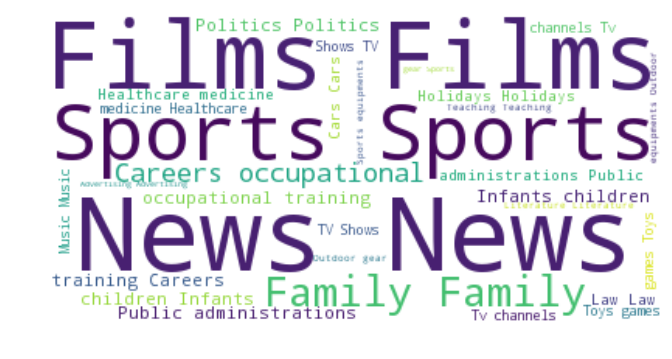

In [31]:
# Покажем облако самых популярных хобби
from wordcloud import WordCloud

text = ''
for i in hobbys_top20:
    for j in range(i[1]):
        text += ' '
        text += i[0]

wc = WordCloud(background_color="white", random_state=42).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [32]:
# подготовим данные
features_3 = list(X_try_1.columns) + [i[0] for i in hobbys_top20]
X_try_3 = X.loc[:, features_3].fillna(value=0).astype('int')
X_try_3_na = X_na.loc[:, features_3].fillna(value=0).astype('int')

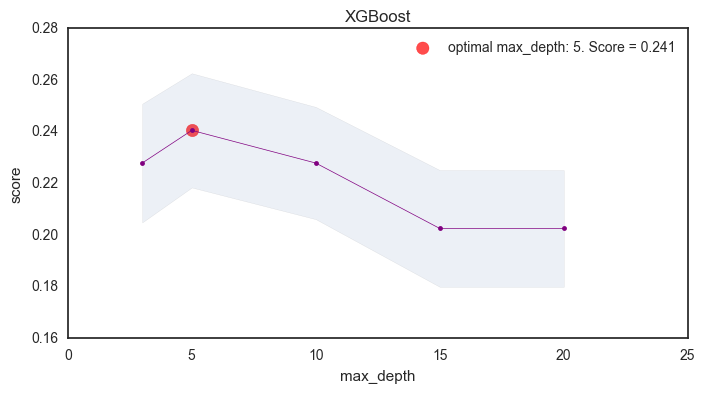

In [33]:
# Boosting
model_xgb_3 = XGBClassifier(objective='multi:softprob', n_estimators=100)
grid_xgb_3 = GridSearchCV(model_xgb_3, param_grid={'max_depth': [3,5,10,15,20]}, cv=kfold)
grid_xgb_3.fit(X_try_3.values, y=Y)

plt.figure(figsize=(8,4))
plt.title('XGBoost')
plot_scores(grid_xgb_3, 'max_depth')

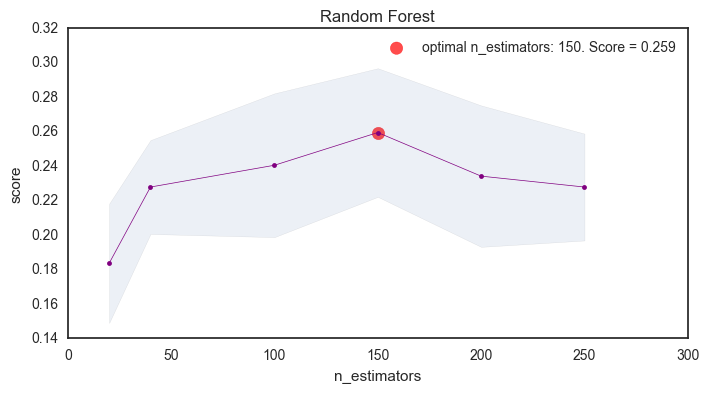

In [34]:
# RandomForest
model_rf_3 = RandomForestClassifier(random_state=42)
grid_rf_3 = GridSearchCV(model_rf_3, param_grid={'n_estimators': [20,40,100,150,200,250]}, cv=kfold)
grid_rf_3.fit(X_try_3, Y)

plt.figure(figsize=(8,4))
plt.title('Random Forest')
plot_scores(grid_rf_3, 'n_estimators')

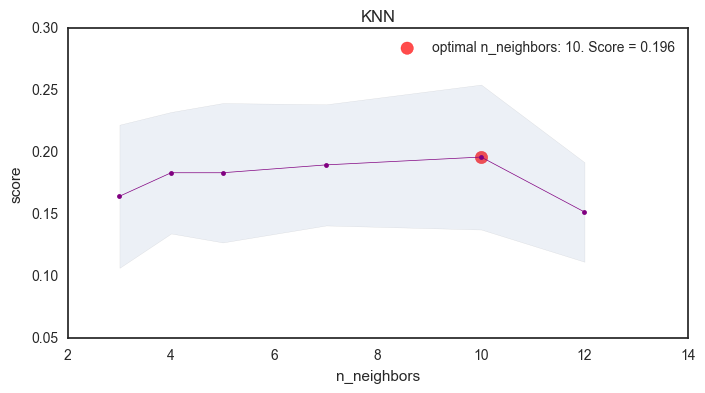

In [35]:
# KNN
model_knn_3 = KNeighborsClassifier()
grid_knn_3 = GridSearchCV(model_knn_3, param_grid={'n_neighbors': [3, 4, 5, 7, 10, 12]}, cv=kfold)
grid_knn_3.fit(X_try_3, Y)

plt.figure(figsize=(8,4))
plt.title('KNN')
plot_scores(grid_knn_3, 'n_neighbors')

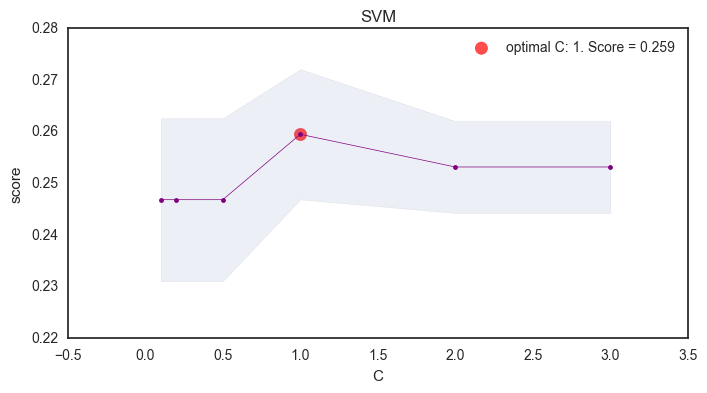

In [36]:
# SVM
model_svm_3 = SVC(decision_function_shape='ovo')
grid_svm_3 = GridSearchCV(model_svm_3, param_grid={'C': [ 0.1, 0.2, 0.5, 1, 2, 3 ]}, cv=kfold)
grid_svm_3.fit(X_try_3, Y)

plt.figure(figsize=(8,4))
plt.title('SVM')
plot_scores(grid_svm_3, 'C')

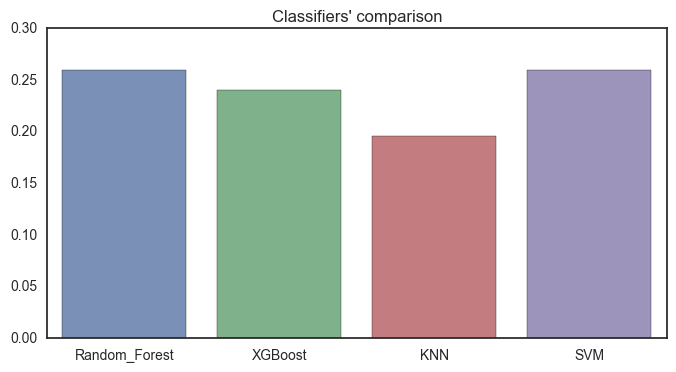

In [37]:
models = [grid_rf_3, grid_xgb_3, grid_knn_3, grid_svm_3]

plt.figure(figsize=(8,4))
plt.title("Classifiers' comparison")
sns.barplot( x = ['Random_Forest', 'XGBoost', 'KNN', 'SVM'],
            y = [i.best_score_ for i in models], alpha=0.8 )

Оставив самые популярные хобби, мы не смогли улучшить качество классификатора.

Поэтому следующий пункт (балансировку классов) будем делать на основании social признаков без добавления хобби.

__Подход 4: Балансировка классов__

In [38]:
from sklearn.cross_validation import StratifiedKFold
strat_kfold = StratifiedKFold(Y, n_folds=5, random_state=42, shuffle=True)

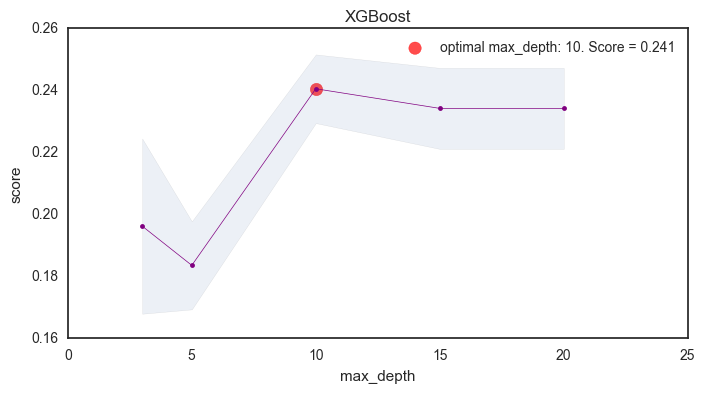

In [39]:
# Boosting
model_xgb_4 = XGBClassifier(objective='multi:softprob', n_estimators=100)
grid_xgb_4 = GridSearchCV(model_xgb_4, param_grid={'max_depth': [3,5,10,15,20]}, cv=strat_kfold)
grid_xgb_4.fit(X_try_1.values, y=Y)

plt.figure(figsize=(8,4))
plt.title('XGBoost')
plot_scores(grid_xgb_4, 'max_depth')

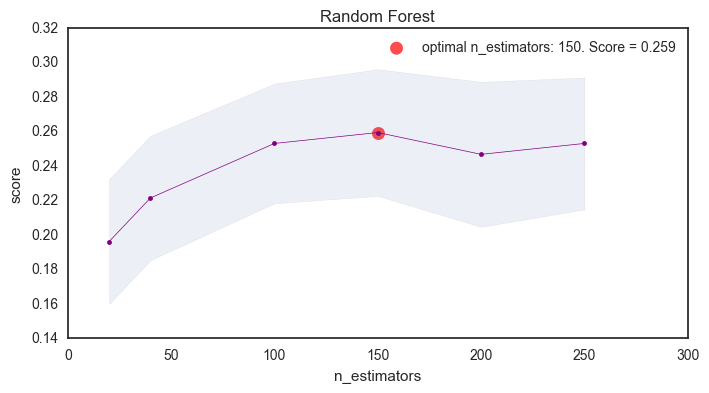

In [40]:
# RandomForest
model_rf_4 = RandomForestClassifier(random_state=42)
grid_rf_4 = GridSearchCV(model_rf_4, param_grid={'n_estimators': [20,40,100,150,200,250]}, cv=strat_kfold)
grid_rf_4.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('Random Forest')
plot_scores(grid_rf_4, 'n_estimators')

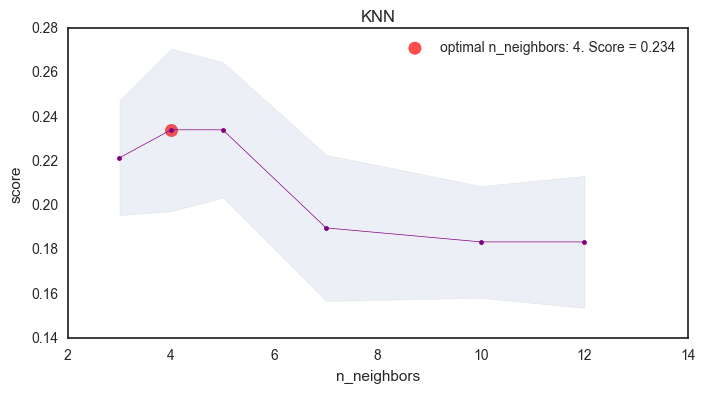

In [41]:
# KNN
model_knn_4 = KNeighborsClassifier()
grid_knn_4 = GridSearchCV(model_knn_4, param_grid={'n_neighbors': [3, 4, 5, 7, 10, 12]}, cv=strat_kfold)
grid_knn_4.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('KNN')
plot_scores(grid_knn_4, 'n_neighbors')

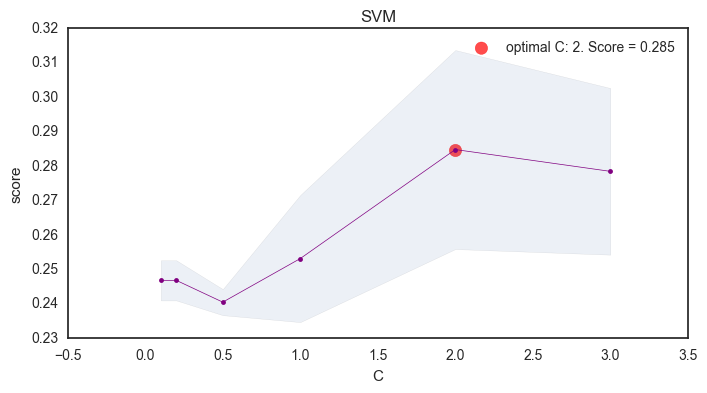

In [42]:
# SVM
model_svm_4 = SVC(decision_function_shape='ovo')
grid_svm_4 = GridSearchCV(model_svm_4, param_grid={'C': [ 0.1, 0.2, 0.5, 1, 2, 3 ]}, cv=strat_kfold)
grid_svm_4.fit(X_try_1, Y)

plt.figure(figsize=(8,4))
plt.title('SVM')
plot_scores(grid_svm_4, 'C')

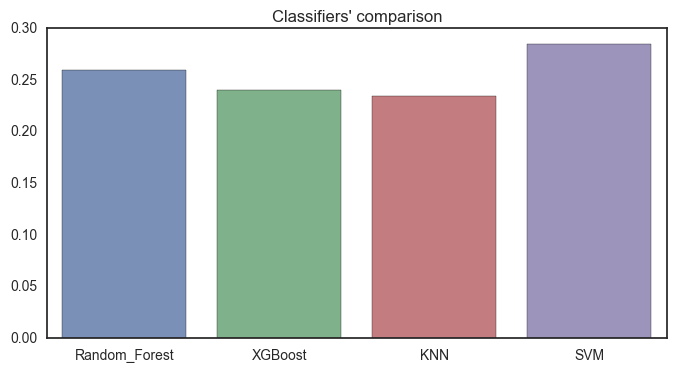

In [43]:
models = [grid_rf_4, grid_xgb_4, grid_knn_4, grid_svm_4]

plt.figure(figsize=(8,4))
plt.title("Classifiers' comparison")
sns.barplot( x = ['Random_Forest', 'XGBoost', 'KNN', 'SVM'],
            y = [i.best_score_ for i in models], alpha=0.8 )

Стратификация тоже не дала никаких улучшений.

## Этап 4: Выводы и предсказания

 + Подтвердились наши исходные неутешительные прогнозы в отношении качества данных. Возможно, что была некорректно произведена выгрузка данных из стороннего источника, это стоит перепроверить. Если ошибки data_import никакой не было, то велика вероятность того, что по данным признакам провести классификацию не представляется возможным. Различные семейства алгоритмов и стандартные рекоммендации по улучшению качества не дали хоть сколь-нибудь значимых результатов
 + Победителем оказался метод опорных векторов ( **SVM** ) с обучением только на социально-демографических признаках без добавления хобби.

In [44]:
# сделаем предсказания по лучшему классификатору (SVM на этапе 1)
result = grid_svm_1.predict(X_try_1_na)
result

array([3, 1, 5, 5, 5, 5, 5, 5, 1, 6, 4, 4, 5, 1, 5, 5, 5, 6, 2, 5, 5, 1, 6,
       5, 1, 1, 5, 2, 5, 5, 4, 4, 6, 5, 5, 5, 6, 1, 1, 5, 5, 5, 4, 4])

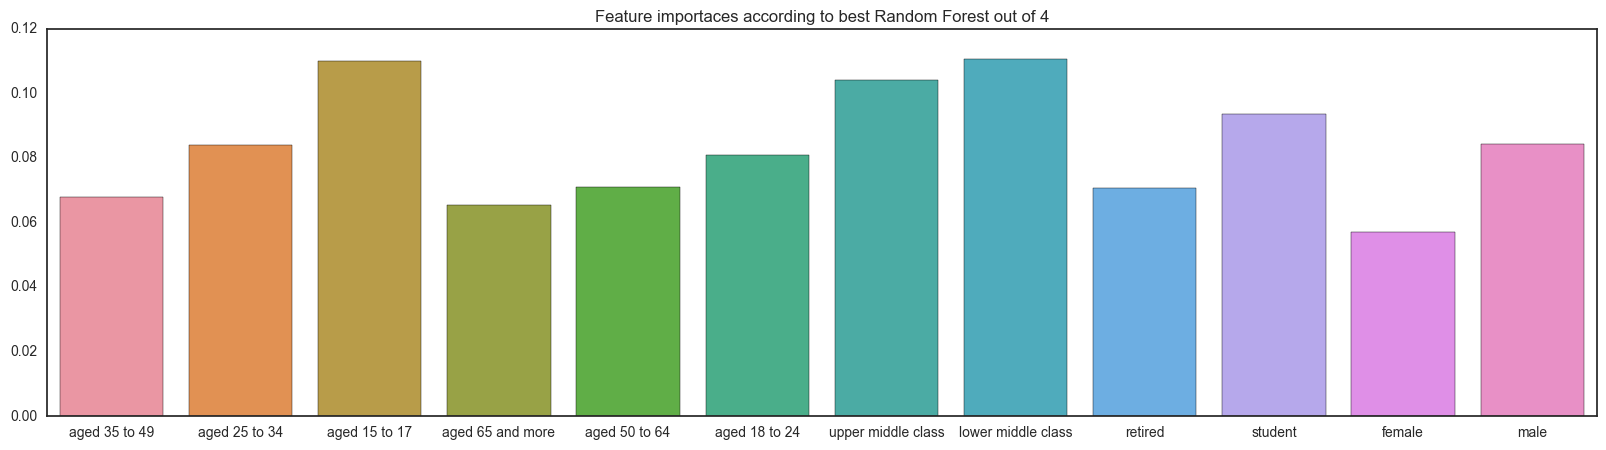

In [45]:
model_rf_1.fit(X_try_1, Y)
plt.figure(figsize=(20,5))
plt.title('Feature importaces according to best Random Forest out of 4')
sns.barplot(y=model_rf_1.feature_importances_, x=X_try_1.columns)

In [46]:
print(model_rf_1.feature_importances_)
X_try_1.columns

[ 0.06785154  0.0839923   0.11015327  0.06555912  0.07087947  0.08091267
  0.1042804   0.11054071  0.07081534  0.09357652  0.05702864  0.08441001]


Index(['aged 35 to 49', 'aged 25 to 34', 'aged 15 to 17', 'aged 65 and more',
       'aged 50 to 64', 'aged 18 to 24', 'upper middle class',
       'lower middle class', 'retired', 'student', 'female', 'male'],
      dtype='object')

<hr>

## Appendix - Chain Task ( *draft* )

__Задание__

Еще один сэмпл логов. Цель - получить "цепочки" переходов пользователей между сайтами. То есть для каждой айдишки мы имеем время посещения и название сайта (sitename)  - остальные колонки в данный момент нас не интересуют. Группируем по айдишкам, сортируем по времени - получаем маршрут пользователя. В качестве результата показать сколько у нас однозвеньевых цепочек, сколько 2-5 звеньев, сколько состоят из 5   более шагов. Показать наиболее популярные цепочки. Полезно для понимания поведения пользователя в интернете. В реальности мы помимо сайтнеймов имеем еще множество интересных метрик, которые дают ее больше информации и позволят далее кластеризовать пользователей по их поведению + интересам + соцдему итд. Пока только маленький кусочек - просто построить цепочки-маршруты) Кстати, в этой задаче можно сделать красивые картинки для презентации. Клиентом вообще очень нравится видеть на картинке как происходит взаимодействие с их рекламой)

<hr>

__Предобработка__

In [ ]:
# импортируем нужные слова
df_chains = pd.read_csv('./chains.csv', index_col=0)[['id', 'date', 'site']]
df_chains.head()

In [ ]:
site_names = np.unique(df_chains.site.values)
plt.figure(figsize=(8,4))
sns.countplot(df_chains.site, alpha=0.7, linewidth = 0)

In [ ]:
ids = np.unique(df_chains.id.values)
ids = dict(zip(ids, range(len(ids))))

In [ ]:
# преобразуем id в числовой формат
df_chains['user_id'] = df_chains.id.apply(lambda x: ids[x])

In [ ]:
# преобразуем id в числовой формат 
df_chains['user_id'] = df_chains.id.apply(lambda x: ids[x])
df_chains = df_chains.drop('id', axis=1)[['user_id', 'date', 'site']]
df_chains.head()

In [ ]:
# преобразуем дату в удобный для работы формат
df_chains['test'] = df_chains.date.apply( pd.to_datetime )
df_chains = df_chains.drop(labels='date', axis=1)
df_chains.columns = ['user_id', 'site', 'date']

__Группировка и подсчет кликов__

In [ ]:
df_chains_sorted = df_chains.sort_values(by=['user_id', 'date'], axis=0)
df_chains_sorted.head(10)

In [ ]:
# добавляем общее количество кликов каждого пользователя

n_clicks = df_chains.groupby('user_id').size()
df_chains['n_clicks'] = df_chains.user_id.apply( lambda x: n_clicks[x] )
df_chains.head()

In [ ]:
# количество кликов на каждый сайт в разрезе пользователя

site_clicks = df_chains.groupby(['user_id', 'site']).size()
df_test = pd.DataFrame(data=site_clicks, index=site_clicks.index)
df_chains_indexed = df_chains.set_index(keys=['user_id', 'site'])
n_sites = df_chains[['user_id', 'site']].groupby(by = 'user_id').size()

In [ ]:
# оставим только цепочки переходов (удалим серединные дубликаты). Например:
# тоесть mail-mail-youtube ----> mail-youtube
# mail-youtube-youtube-mail -----> mail-youtube-mail

df_test = pd.DataFrame(columns=df_chains.columns)
user_data = df_chains[df_chains.user_id == 866536] # тест


__Неясности:__

1. Переход на тот же сайт спустя 30-60 минут это новое посещение или нет?
2. Аналогично, другой сайт был посещен через 30-60 минут, это переход? А через 5 часов? А через 24? Другими словами где граница, между переходом и новым посещением.<br>
Или уникальность задачи как раз в том, чтобы эту границу определить?
3. Если же время перехода не приходится как-то выбирать, то это похоже на просто обработку большого массива данных. Или необходимо было применить методы ML для как раз визуализации цепочек переходов.

Не стал лишний раз уточнять эти моменты, взял для себя просто задачу под пунктом 2.